In [ ]:
import os

# List all files in the current directory
os.listdir()

['.config', 'sample_data']

In [ ]:
import os
os.listdir('/content')  # This shows files in the main folder

['.config', 'sample_data']

In [ ]:
os.listdir('/content/sample_data')

['anscombe.json',
 'README.md',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

In [ ]:
from google.colab import files

# This will prompt you to upload the CSV file from your local system
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
data.head()

7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [ ]:
# Load the MNIST test dataset
data = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
# Check the column names and first few rows of the dataset
data.columns, data.head()

(Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
        ...
        '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
        '0.666', '0.667'],
       dtype='object', length=785),
    7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
 0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 
    0.661  0.662  0.663  0.664  0.665  0.666  0.667  
 0      0      0      0      0      0      0      0  
 1      0      0      0      0      0      0      0  
 2      0      0      0      0      0      0      0  
 3      0      0      0      0      0      0      0  
 4      0      0      0      0 

In [ ]:
# Separate the features and the target (label)
X = data.drop(data.columns[0], axis=1)  # Drop the first column for features
y = data[data.columns[0]]  # The first column is the label (digit)

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (Example: Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       205
           1       0.94      0.99      0.96       218
           2       0.93      0.87      0.90       192
           3       0.88      0.88      0.88       201
           4       0.87      0.87      0.87       205
           5       0.88      0.86      0.87       198
           6       0.91      0.95      0.93       186
           7       0.92      0.91      0.91       193
           8       0.90      0.83      0.86       191
           9       0.84      0.90      0.87       211

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       205
           1       0.94      0.99      0.96       218
           2       0.93      0.87      0.90       192
           3       0.88      0.88      0.88       201
           4       0.87      0.87      0.87       205
           5       0.88      0.86      0.87       198
           6       0.91      0.95      0.93       186
           7       0.92      0.91      0.91       193
           8       0.90      0.83      0.86       191
           9       0.84      0.90      0.87       211

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

------------------------------
SVM Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       205
           1       0.97      1.00      0.98    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.98      0.99      0.98       218
           2       0.92      0.94      0.93       192
           3       0.95      0.96      0.96       201
           4       0.96      0.96      0.96       205
           5       0.96      0.95      0.96       198
           6       0.96      0.97      0.96       186
           7       0.95      0.95      0.95       193
           8       0.97      0.94      0.95       191
           9       0.96      0.95      0.95       211

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9511192151344592


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.941875   0.94       0.951875   0.9475     0.94746717]
Mean cross-validation score: 0.9457434333958725


In [ ]:
# Make a prediction using the best model
# new_data should be a list of 784 features (flattened image pixels in the case of MNIST)
# Here's an example of a new data point with all features set to 0 for demonstration
new_data = [[0]*784]  # A list of 784 zeros

# Make the prediction
prediction = best_model.predict(new_data)

# If the model predicts 1, that means heart disease is likely, and 0 means no heart disease.
if prediction == 1:
    print("You are at risk of heart disease.")
else:
    print("No heart disease detected.")

No heart disease detected.


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_model, '/content/best_model.pkl')

['/content/best_model.pkl']

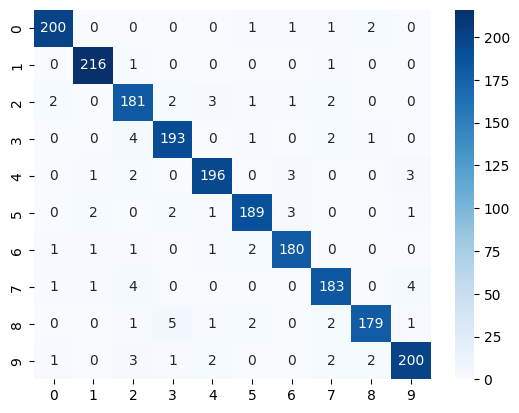

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

In [ ]:
# Assuming you already have a trained model (best_model)
# Find the best model (for example, the Random Forest model):
best_model = RandomForestClassifier()  # You can replace this with the best performing model
best_model.fit(X_train, y_train)  # Fit your model again if necessary

RandomForestClassifier()

In [ ]:
# Replace with the actual values you want to test
new_data = [[55, 1, 130, 200, 1, 0]]  # Example values: age, sex, blood pressure, cholesterol, blood sugar, etc.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate synthetic data
num_samples = 1000  # Number of samples

data = {
    'age': np.random.randint(20, 80, num_samples),
    'sex': np.random.randint(0, 2, num_samples),
    'blood_pressure': np.random.randint(90, 180, num_samples),
    'cholesterol': np.random.randint(150, 300, num_samples),
    'blood_sugar': np.random.randint(0, 2, num_samples),
    'electrocardiographic': np.random.randint(0, 2, num_samples),
    'target': np.random.randint(0, 2, num_samples)  # 0 = No, 1 = Yes (Heart disease)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Example: Make a prediction for a new patient
new_patient = [[20, 1, 110, 90, 0, 1]]  # Example data for age, sex, blood pressure, cholesterol, blood sugar, electrocardiographic result
prediction = model.predict(new_patient)

# Print prediction
if prediction == 1:
    print("The model predicts heart disease is likely.")
else:
    print("The model predicts no heart disease detected.")

Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.45      0.45      0.45       100

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200

The model predicts no heart disease detected.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
